In [2]:
using LinearAlgebra, Distributions,SpecialFunctions,Plots

In [51]:
function cruzareal(x1,x2)
    bet = rand()
    return bet * x1 + (1-bet)*x2
end

function mutacionreal(hijo,mutacion)
    r = rand(length(hijo),1);
    return hijo + mutacion.*r;
end

function seleccion(x,y)
    prob = y./sum(y)
    p=sample(prob)
    r=findall(x->x==p,prob)
    rr=r[1][2]
    padre=x[:,rr]
    return padre
end

function Cod_real_f1(n,N,ciclos,L,mutacion,razonmutacion)

    # Población inicial
    x=rand(Uniform(-L,L),n,N)

    for i = 1:ciclos

        # Evaluar la función
        y = f_1(x)

        for j = 1:N
        #j=1
            # Selección  
        
            padre1=seleccion(x,y)
            padre2=seleccion(x,y)

            if padre1 == padre2
                padre2=seleccion(x,y)
            end

            # Cruza
            hijo = cruzareal(padre1,padre2)

            # Mutación
            hmutado = mutacionreal(hijo,mutacion)

            # Nuevo valor de x
            x[:,j] = hmutado

            #Condicion para quedarse dentro del dominio de busqueda [-L L]
            if sum(abs.(x[:,j]).>=L) >= 1
                x=rand(Uniform(-L,L),n,N)
            end

        end
        # Cambio en la mutacion
        mutacion = razonmutacion * mutacion;
    end

    #=x_min=string(floor(mean(x[1,:]),digits=4))
    y_min=string(floor(mean(x[2,:]),digits=4))=#
    #v_min=floor(ff_1(mean(x[1,:]),mean(x[2,:])),digits=4)
    v_min=ff_1(x[1,N],x[2,N])
    #v_min=floor(ff_1(mean(x[1,:]),mean(x[2,:])),digits=4)
    #=xx=collect(range(-L,L,100))
    yy=xx
    heatmap(xx,yy,ff_1.(xx,yy'),aspect_ratio=1,title="f_min($x_min,$y_min)=$v_min",titlefont=font(12,"Computer Modern"))
    scatter!(x[1,:],x[2,:],label="f_min")=#

    return v_min

end

function Cod_real_ff1(n,N,ciclos,L,mutacion,razonmutacion)

    # Población inicial
    x=rand(Uniform(-L,L),n,N)

    for i = 1:ciclos

        # Evaluar la función
        y = f_1(x)

        for j = 1:N
        #j=1
            # Selección  
        
            padre1=seleccion(x,y)
            padre2=seleccion(x,y)

            if padre1 == padre2
                padre2=seleccion(x,y)
            end

            # Cruza
            hijo = cruzareal(padre1,padre2)

            # Mutación
            hmutado = mutacionreal(hijo,mutacion)

            # Nuevo valor de x
            x[:,j] = hmutado

            #Condicion para quedarse dentro del dominio de busqueda [-L L]
            if sum(abs.(x[:,j]).>=L) >= 1
                x=rand(Uniform(-L,L),n,N)
            end

        end
        # Cambio en la mutacion
        mutacion = razonmutacion * mutacion;
    end

    x

    x_min=string(floor(mean(x[1,:]),digits=4))
    y_min=string(floor(mean(x[2,:]),digits=4))
    v_min=string(floor(ff_1(mean(x[1,:]),mean(x[2,:])),digits=4))

    xx=collect(range(-L,L,100))
    yy=xx
    heatmap(xx,yy,ff_1.(xx,yy'),aspect_ratio=1,title="f_min($x_min,$y_min)=$v_min",titlefont=font(12,"Computer Modern"))
    scatter!(x[1,:],x[2,:],label="f_min")

end

function Plot_Cod_ff1(mutacion,razonmutacion,I)

    n=2; #Dimensionalidad
    N=100; #Individuos de la población 
    ciclos = 100;
    L=2.5 #Intervalo de busqueda

    a=zeros(1,I);
    b=zeros(1,I);

    for i=1:I
        a[1,i]=i
        b[1,i]=Cod_real_f1(n,N,ciclos,L,mutacion,razonmutacion)
    end

    scatter(a,b,label=false,title="Mutación=$mutacion Razón mutación=$razonmutacion",titlefont=font(12,"Computer Modern"))
end

function f_1(x)
    y=zeros(1,size(x,2))
    for j=1:size(x,2) #Número de iteraciones
        y[1,j]=besselj0(x[1,j]^2+x[2,j]^2)+.1*abs(1-x[1,j])+.1*abs(1-x[2,j])
    end
    return y
end

ff_1(x,y)=besselj0(x^2+y^2)+.1*abs(1-x)+.1*abs(1-y)

#Function 2

function Cod_real_f2(n,N,ciclos,L,mutacion,razonmutacion)
    # Población inicial
    x=rand(Uniform(-L,L),n,N)

    for i = 1:ciclos
        # Evaluar la función
        y = f_2(x)

        for j = 1:N
        #j=1
            # Selección  
        
            padre1=seleccion(x,y)
            padre2=seleccion(x,y)

            if padre1 == padre2
                padre2=seleccion(x,y)
            end

            # Cruza
            hijo = cruzareal(padre1,padre2)

            # Mutación
            hmutado = mutacionreal(hijo,mutacion)

            # Nuevo valor de x
            x[:,j] = hmutado

            #Condicion para quedarse dentro del dominio de busqueda [-L L]
            if sum(abs.(x[:,j]).>=L) >= 1
                x=rand(Uniform(-L,L),n,N)
            end

        end
        # Cambio en la mutacion
        mutacion = razonmutacion * mutacion;
    end

    #=x_min=string(floor(mean(x[1,:]),digits=4))
    y_min=string(floor(mean(x[2,:]),digits=4))=#
    v_min=floor(ff_2(x[:,N]'))

    #=xx=collect(range(-L,L,100))
    yy=xx
    heatmap(xx,yy,ff_1.(xx,yy'),aspect_ratio=1,title="f_min($x_min,$y_min)=$v_min",titlefont=font(12,"Computer Modern"))
    scatter!(x[1,:],x[2,:],label="f_min")=#

    return v_min

end

function ff_2(x)
    n=7 #Número de dimensiones
    y=0
    for i=1:n-1
        y=y+100*(x[1,i+1]-x[1,i]^2)^2+(1-x[1,i])^2
    end
    return y
end

function f_2(x)

    y=zeros(1,size(x,2))

    n=7
    for j=1:size(x,2) #Número de iteraciones
        yy=0
        for i=1:n-1
            yy=yy+100*(x[i+1,j]-x[i,j]^2)^2+(1-x[i,j])^2
        end
        y[1,j]=yy
    end

    y
    return y
end

function Plot_Cod_f2(mutacion,razonmutacion,I)

    n=7; #Dimensionalidad
    N=100; #Individuos de la población 
    ciclos = 100;
    L=2.5 #Intervalo de busqueda

    a=zeros(1,I);
    b=zeros(1,I);

    for i=1:I
        a[1,i]=i
        b[1,i]=Cod_real_f2(n,N,ciclos,L,mutacion,razonmutacion)
    end

    scatter(a,b,label=false,title="Mutación=$mutacion Razón mutación=$razonmutacion",titlefont=font(12,"Computer Modern"))
end

function ff_3(x)
    n=10 #Número de dimensiones
    y=0
    p=1
    for i=1:n
        y=y+log((x[1,i]-2))^2+(log(10-x[1,i]))^2
        p=p*x[1,i]
    end
    return y-(p)^(.2)
end

function f_3(x)
    
    y=zeros(1,size(x,2))

    n=10
    for j=1:size(x,2) #Número de iteraciones
        yy=0
        pp=1
        for i=1:n
            yy=yy+log((x[i,j]-2))^2+(log(10-x[i,j]))^2
            pp=pp*x[i,j]
        end
        y[1,j]=yy-(pp)^(.2)
    end
    return y
end

function Cod_real_f3(n,N,ciclos,mutacion,razonmutacion)
    # Población inicial
    x=rand(Uniform(2.01,9.99),n,N)

    for i = 1:ciclos
        # Evaluar la función
        y = f_3(x)

        for j = 1:N
        #j=1
            # Selección  
        
            padre1=seleccion(x,y)
            padre2=seleccion(x,y)

            if padre1 == padre2
                padre2=seleccion(x,y)
            end

            # Cruza
            hijo = cruzareal(padre1,padre2)

            # Mutación
            hmutado = mutacionreal(hijo,mutacion)

            # Nuevo valor de x
            x[:,j] = hmutado

            #Condicion para quedarse dentro del dominio de busqueda [-L L]
            if sum(abs.(x[:,j]).>=2.01) >= 1 | sum(abs.(x[:,j]).<=9.99) >= 1
                x=rand(Uniform(2.01,9.99),n,N)
            end

        end
        # Cambio en la mutacion
        mutacion = razonmutacion * mutacion;
    end

    #=x_min=string(floor(mean(x[1,:]),digits=4))
    y_min=string(floor(mean(x[2,:]),digits=4))=#
    v_min=floor(ff_3(x[:,N]'))

    #=xx=collect(range(-L,L,100))
    yy=xx
    heatmap(xx,yy,ff_1.(xx,yy'),aspect_ratio=1,title="f_min($x_min,$y_min)=$v_min",titlefont=font(12,"Computer Modern"))
    scatter!(x[1,:],x[2,:],label="f_min")=#

    return v_min

end

function Plot_Cod_f3(mutacion,razonmutacion,I)

    n=10; #Dimensionalidad
    N=100; #Individuos de la población 
    ciclos = 100;

    a=zeros(1,I);
    b=zeros(1,I);

    for i=1:I
        a[1,i]=i
        b[1,i]=Cod_real_f3(n,N,ciclos,mutacion,razonmutacion)
    end

    scatter(a,b,label=false,title="Mutación=$mutacion Razón mutación=$razonmutacion",titlefont=font(12,"Computer Modern"))
end


Plot_Cod_f3 (generic function with 1 method)

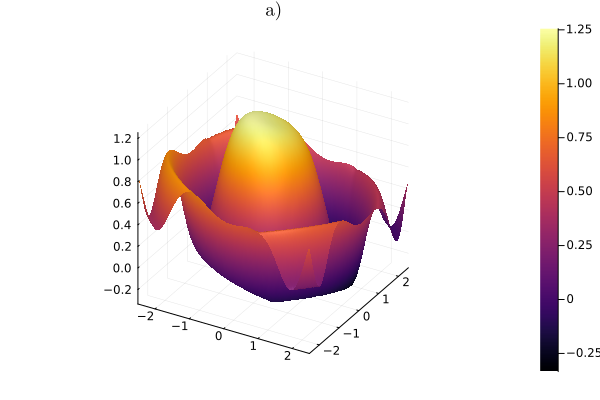

In [38]:
##Inciso a)

x=collect(range(-2.5,2.5,100))
y=x
surface(x,y,ff_1,title="a)",titlefont=font(12,"Computer Modern"))

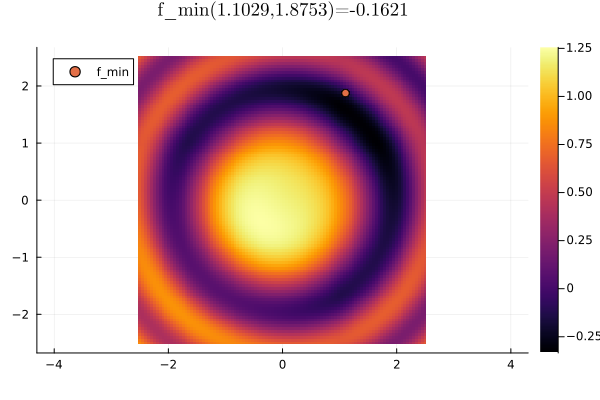

In [11]:
## Function 1 ##

n=2; #Dimensionalidad
N=100; #Individuos de la población 
ciclos = 100;
L=2.5 #Intervalo de busqueda
#mutacion = 0.7;
#razonmutacion = 0.99;
mutacion = 0.8;
razonmutacion = 0.82; #Factor de reducción de la tasa de mutación en cada generación

Cod_real_ff1(n,N,ciclos,L,mutacion,razonmutacion)

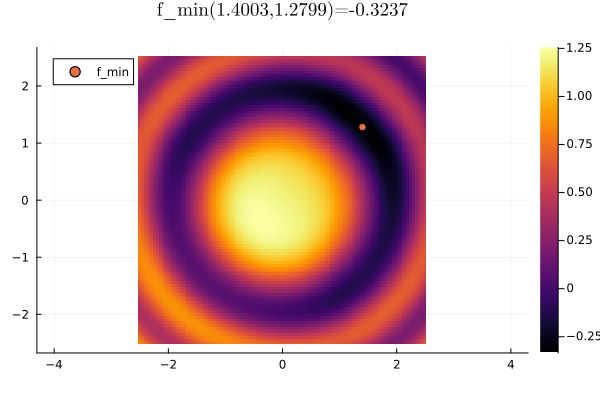

In [13]:
n=2; #Dimensionalidad
N=100; #Individuos de la población 
ciclos = 100;
L=2.5 #Intervalo de busqueda
#mutacion = 0.7;
#razonmutacion = 0.99;
mutacion = 0.8;
razonmutacion = 0.82; #Factor de reducción de la tasa de mutación en cada generación
Cod_real_f1(n,N,ciclos,L,mutacion,razonmutacion)

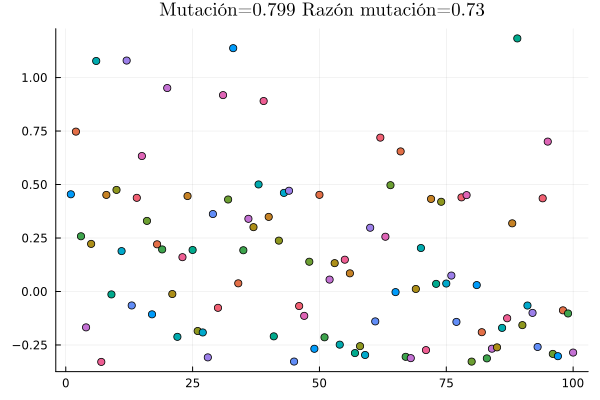

In [30]:
I=100;
mutacion = 0.799; 
razonmutacion = 0.73; #Factor de reducción de la tasa de mutación en cada generación

Plot_Cod_f1(mutacion,razonmutacion,I)

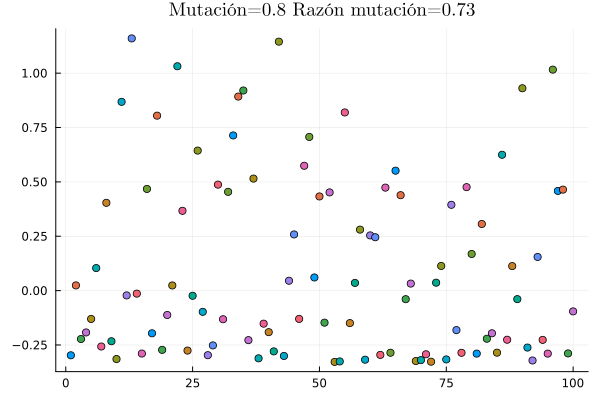

In [25]:
mutacion = 0.8; 
razonmutacion = 0.73; 

Plot_Cod_f1(mutacion,razonmutacion,I)

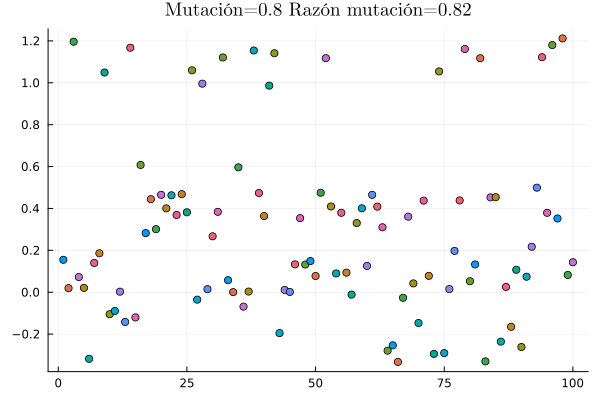

In [66]:
mutacion = 0.8; 
razonmutacion = 0.82; 

Plot_Cod_f1(mutacion,razonmutacion,I)

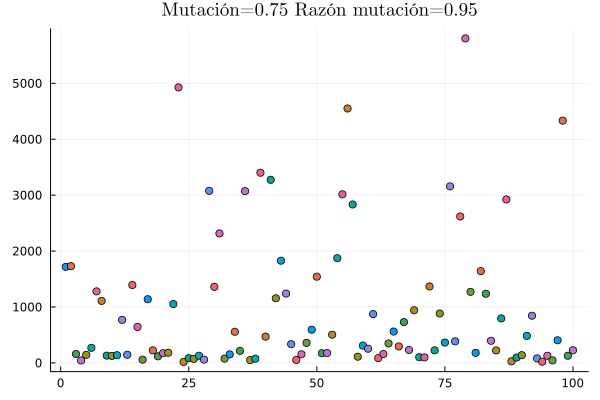

In [44]:
#Inciso b)
## Function 2 ##

I=100;
mutacion = 0.75; 
razonmutacion = 0.95; 

Plot_Cod_f2(mutacion,razonmutacion,I)

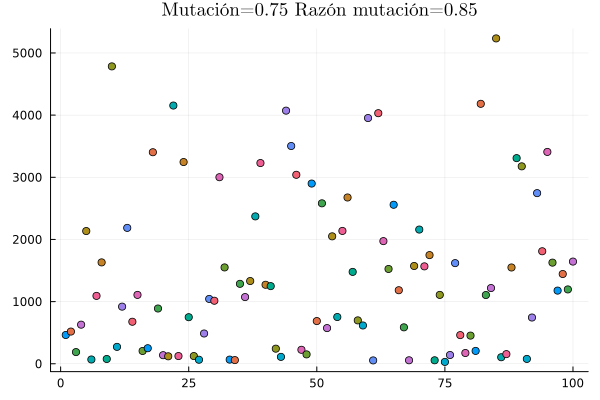

In [45]:
mutacion = 0.75; 
razonmutacion = 0.85; #Factor de reducción de la tasa de mutación en cada generación

Plot_Cod_f2(mutacion,razonmutacion,I)

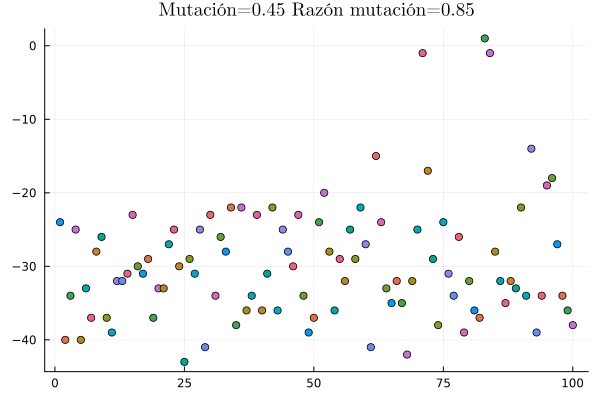

In [76]:
# Inciso c)
## Function 3 ##

I=100;
mutacion = 0.45; 
razonmutacion = 0.85; 

Plot_Cod_f3(mutacion,razonmutacion,I)

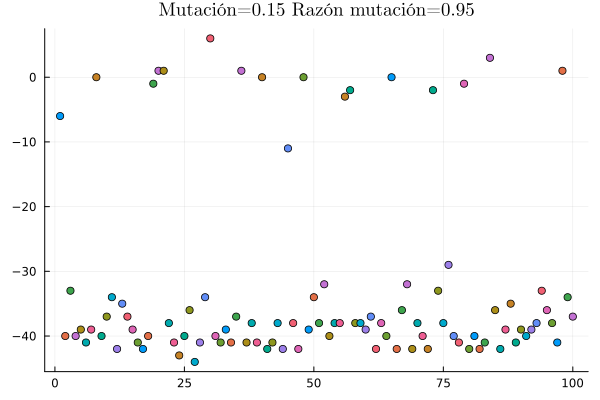

In [72]:
mutacion = 0.15; 
razonmutacion = 0.95; 

Plot_Cod_f3(mutacion,razonmutacion,I)